In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
data = pd.read_csv('../data/Mall_Customers.csv')

print("Dataset shape:", data.shape)
print("\nFirst 5 rows:")
print(data.head())
print("\nData info:")
print(data.info())
print("\nSummary statistics:")
print(data.describe())
print("\nMissing values:", data.isnull().sum().sum())

Dataset shape: (200, 5)

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import os
os.environ["OMP_NUM_THREADS"] = "1"

# Drop CustomerID and encode Gender
data_encoded = data.copy()
data_encoded['Gender'] = data_encoded['Gender'].map({'Male': 0, 'Female': 1})

# Select numerical features for clustering
feature_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']
X = data_encoded[feature_cols].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Features used: {feature_cols}")
print(f"Scaled data shape: {X_scaled.shape}")
print(f"Mean after scaling: {X_scaled.mean(axis=0).round(3)}")
print(f"Std after scaling: {X_scaled.std(axis=0).round(3)}")

Features used: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']
Scaled data shape: (200, 4)
Mean after scaling: [-0. -0. -0. -0.]
Std after scaling: [1. 1. 1. 1.]


c:\Users\user\miniforge3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user\miniforge3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user\miniforge3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user\miniforge3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known

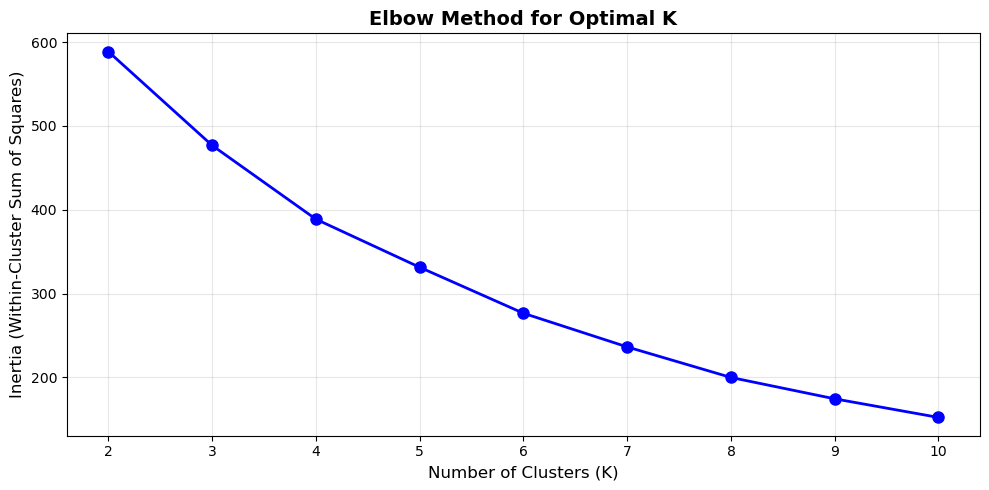

Inertia values:
K=2: 588.80
K=3: 476.79
K=4: 388.72
K=5: 331.31
K=6: 276.41
K=7: 236.20
K=8: 199.75
K=9: 174.24
K=10: 152.03


In [ ]:
# Elbow method: Try K from 2 to 10
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.tight_layout()
plt.show()

print("Inertia values:")
for k, inertia in zip(K_range, inertias):
    print(f"K={k}: {inertia:.2f}")

c:\Users\user\miniforge3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user\miniforge3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user\miniforge3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user\miniforge3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known

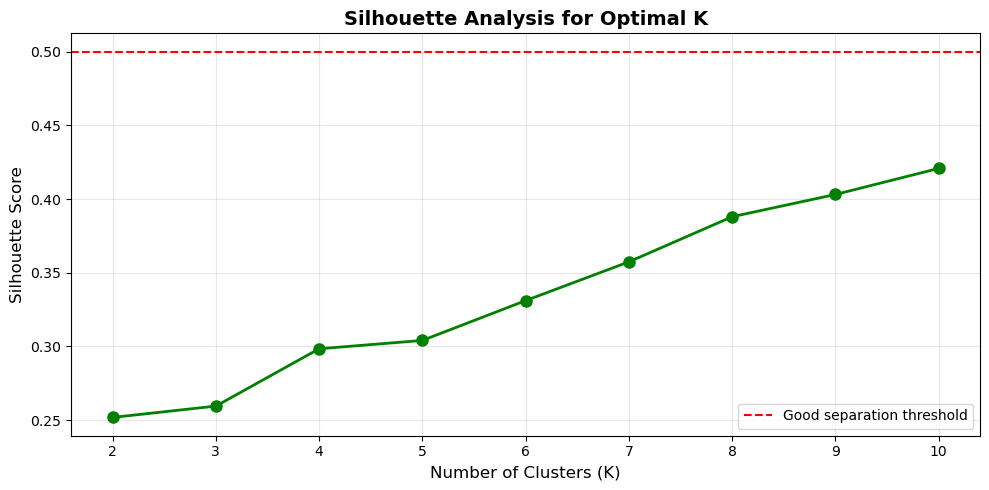

Silhouette scores:
K=2: 0.252
K=3: 0.260
K=4: 0.298
K=5: 0.304
K=6: 0.331
K=7: 0.357
K=8: 0.388
K=9: 0.403
K=10: 0.421


In [5]:
# Silhouette scores for K from 2 to 10
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Analysis for Optimal K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.axhline(y=0.5, color='r', linestyle='--', label='Good separation threshold')
plt.legend()
plt.tight_layout()
plt.show()

print("Silhouette scores:")
for k, score in zip(K_range, silhouette_scores):
    print(f"K={k}: {score:.3f}")

In [6]:
# Apply K-means with optimal K
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original data
data_clustered = data.copy()
data_clustered['Cluster'] = clusters

print(f"Clustering completed with K={optimal_k}")
print(f"\nCluster distribution:")
print(data_clustered['Cluster'].value_counts().sort_index())

Clustering completed with K=5

Cluster distribution:
Cluster
0    39
1    29
2    43
3    54
4    35
Name: count, dtype: int64


c:\Users\user\miniforge3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Statistics:
          Age       Annual Income (k$)       Spending Score (1-100)      
         mean count               mean count                   mean count
Cluster                                                                  
0        32.7    39               86.5    39                   82.1    39
1        36.5    29               89.5    29                   18.0    29
2        49.8    43               49.2    43                   40.1    43
3        24.9    54               39.7    54                   61.2    54
4        55.7    35               53.7    35                   36.8    35


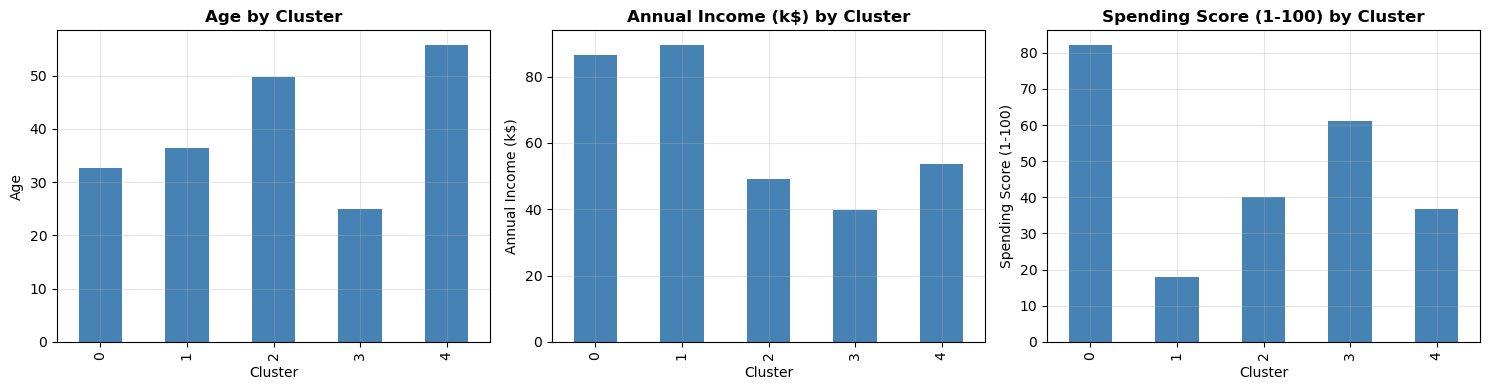

In [7]:
# Calculate cluster statistics
cluster_summary = data_clustered.groupby('Cluster')[['Age', 'Annual Income (k$)',
                                                       'Spending Score (1-100)']].agg(['mean', 'count'])
print("Cluster Statistics:")
print(cluster_summary.round(1))

# Visualize cluster means
cluster_means = data_clustered.groupby('Cluster')[['Age', 'Annual Income (k$)',
                                                     'Spending Score (1-100)']].mean()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for idx, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    cluster_means[col].plot(kind='bar', ax=axes[idx], color='steelblue')
    axes[idx].set_title(f'{col} by Cluster', fontweight='bold')
    axes[idx].set_xlabel('Cluster')
    axes[idx].set_ylabel(col)
    axes[idx].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

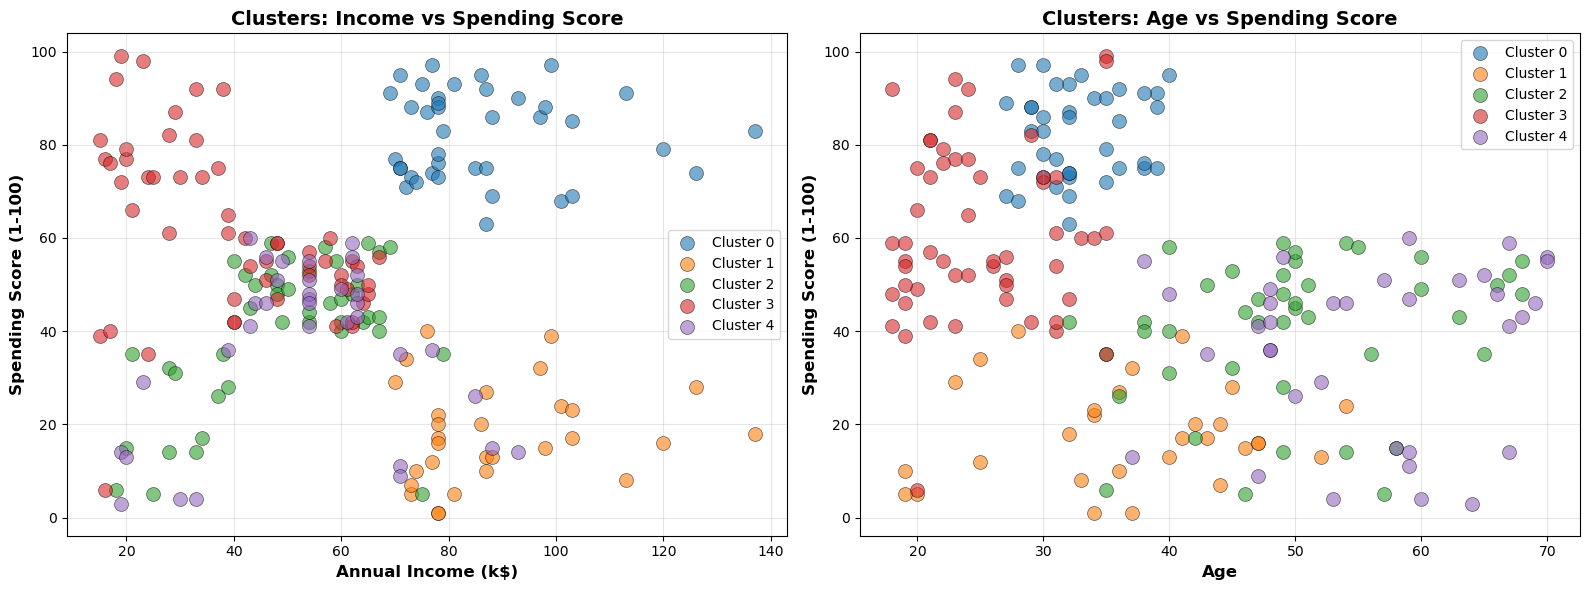

Clusters visualized using original feature space


In [8]:
# Visualize clusters using key features
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Income vs Spending Score
for cluster in range(optimal_k):
    cluster_data = data_clustered[data_clustered['Cluster'] == cluster]
    axes[0].scatter(cluster_data['Annual Income (k$)'],
                   cluster_data['Spending Score (1-100)'],
                   label=f'Cluster {cluster}', alpha=0.6, s=100, edgecolors='black', linewidth=0.5)

axes[0].set_xlabel('Annual Income (k$)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Spending Score (1-100)', fontsize=12, fontweight='bold')
axes[0].set_title('Clusters: Income vs Spending Score', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Age vs Spending Score
for cluster in range(optimal_k):
    cluster_data = data_clustered[data_clustered['Cluster'] == cluster]
    axes[1].scatter(cluster_data['Age'],
                   cluster_data['Spending Score (1-100)'],
                   label=f'Cluster {cluster}', alpha=0.6, s=100, edgecolors='black', linewidth=0.5)

axes[1].set_xlabel('Age', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Spending Score (1-100)', fontsize=12, fontweight='bold')
axes[1].set_title('Clusters: Age vs Spending Score', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Clusters visualized using original feature space")

PCA Results:
Explained variance ratio: [0.33690046 0.26230645]
Total variance explained: 59.9%


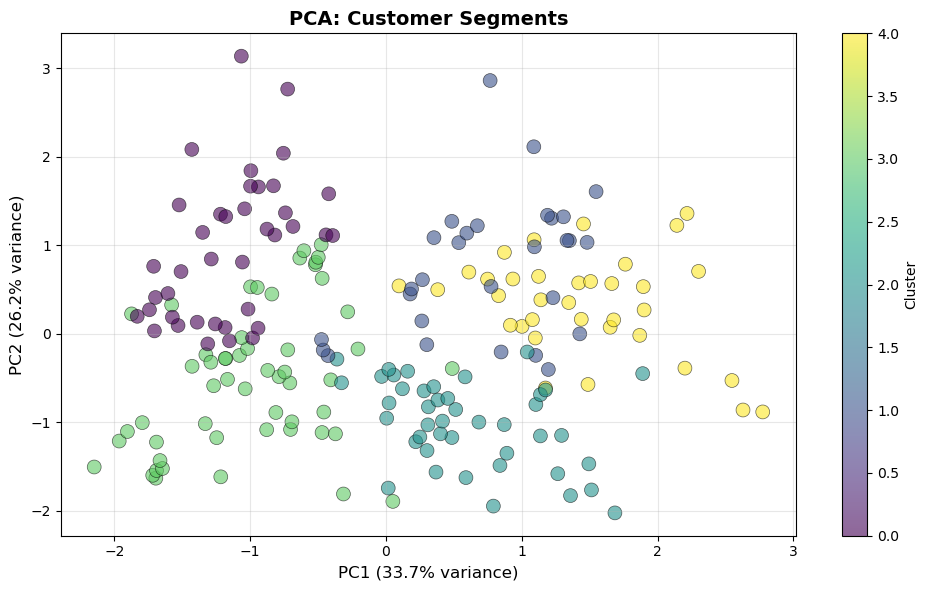

In [9]:
# Dimensionality Reduction
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("PCA Results:")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.1%}")

# Visualize PCA
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis',
                     s=100, alpha=0.6, edgecolors='black', linewidth=0.5)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
plt.title('PCA: Customer Segments', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

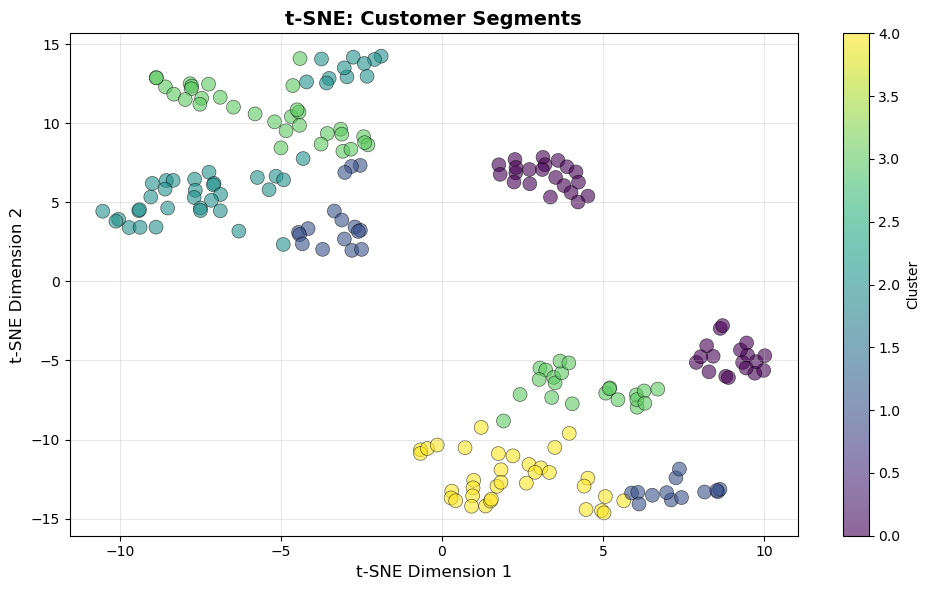

In [10]:
from sklearn.manifold import TSNE
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize t-SNE
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis',
                     s=100, alpha=0.6, edgecolors='black', linewidth=0.5)
plt.xlabel('t-SNE Dimension 1', fontsize=12)
plt.ylabel('t-SNE Dimension 2', fontsize=12)
plt.title('t-SNE: Customer Segments', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


c:\Users\user\miniforge3\envs\ml\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\user\miniforge3\envs\ml\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


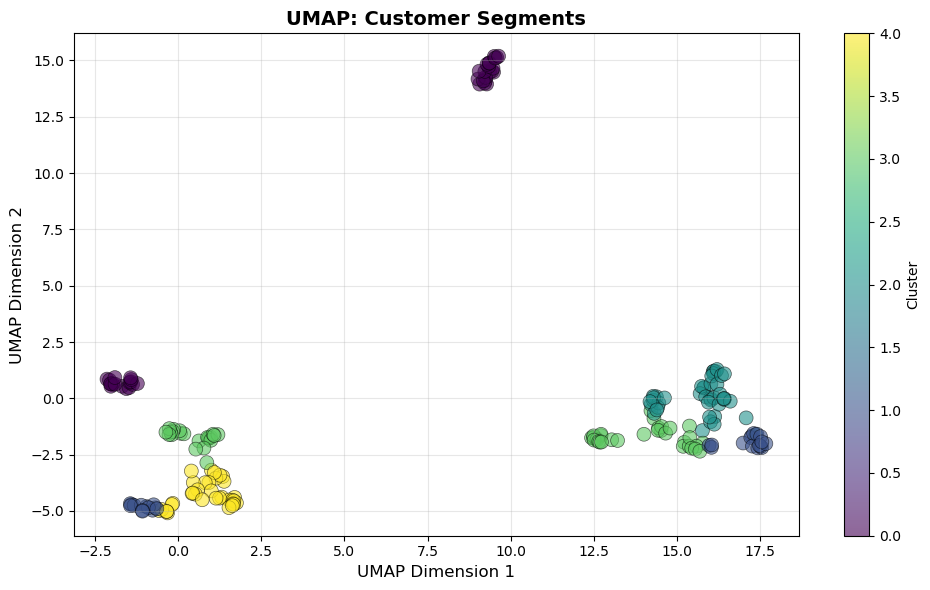

In [11]:
import umap

# Apply UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15)
X_umap = umap_reducer.fit_transform(X_scaled)

# Visualize UMAP
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=clusters, cmap='viridis',
                     s=100, alpha=0.6, edgecolors='black', linewidth=0.5)
plt.xlabel('UMAP Dimension 1', fontsize=12)
plt.ylabel('UMAP Dimension 2', fontsize=12)
plt.title('UMAP: Customer Segments', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Part3 Anomaly Detection


In [12]:
# Apply isolation forest
from sklearn.ensemble import IsolationForest

contamination_values = [0.01, 0.05, 0.1]

print(f"Contamination values to test: {contamination_values}")

Contamination values to test: [0.01, 0.05, 0.1]


In [13]:
anomaly_results = {}

for contamination_val in contamination_values:
    # Initialize Isolation Forest model
    model = IsolationForest(contamination=contamination_val, random_state=42)

    # Fit the model to the scaled data
    model.fit(X_scaled)

    # Predict anomaly labels (-1 for outliers, 1 for inliers)
    predictions = model.predict(X_scaled)

    # Count the number of anomalies
    num_anomalies = list(predictions).count(-1)
    anomaly_results[contamination_val] = num_anomalies

    print(f"Contamination: {contamination_val}, Number of anomalies detected: {num_anomalies}")



Contamination: 0.01, Number of anomalies detected: 2
Contamination: 0.05, Number of anomalies detected: 10
Contamination: 0.1, Number of anomalies detected: 20


In [14]:
# Given that anomalies are typically rare, a contamination value of 0.05 seems a reasonable starting point.
# It implies we expect 5% of the data points to be outliers, which is a common assumption in anomaly detection
# where outliers are not overly abundant but significant enough to be identified.
chosen_contamination = 0.05

# Initialize Isolation Forest model with the chosen contamination value
final_anomaly_model = IsolationForest(contamination=chosen_contamination, random_state=42)

# Fit the model to the scaled data
final_anomaly_model.fit(X_scaled)

# Predict anomaly labels (-1 for outliers, 1 for inliers)
anomaly_labels = final_anomaly_model.predict(X_scaled)

num_anomalies_chosen = list(anomaly_labels).count(-1)
print(f"\nChosen contamination value: {chosen_contamination}")
print(f"Number of anomalies detected with chosen contamination: {num_anomalies_chosen}")


Chosen contamination value: 0.05
Number of anomalies detected with chosen contamination: 10


## Characterize and Categorize Anomalies


In [15]:
# Add new lolumn to store anomaly
data_clustered['Anomaly'] = anomaly_labels

print("First 5 rows of data_clustered with Anomaly column:")
print(data_clustered.head())

First 5 rows of data_clustered with Anomaly column:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  Anomaly  
0        3        1  
1        3        1  
2        3       -1  
3        3        1  
4        3        1  


In [16]:
# Filter out anomaly
anomalies_df = data_clustered[data_clustered['Anomaly'] == -1]

print("Anomalies DataFrame shape:", anomalies_df.shape)
print("\nFirst 5 rows of anomalies_df:")
print(anomalies_df.head())
print("\nDescriptive statistics of anomalies:")
print(anomalies_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']].describe())

Anomalies DataFrame shape: (10, 7)

First 5 rows of anomalies_df:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
2            3  Female   20                  16                       6   
8            9    Male   64                  19                       3   
10          11    Male   67                  19                      14   
12          13  Female   58                  20                      15   
30          31    Male   60                  30                       4   

    Cluster  Anomaly  
2         3       -1  
8         4       -1  
10        4       -1  
12        2       -1  
30        4       -1  

Descriptive statistics of anomalies:
             Age  Annual Income (k$)  Spending Score (1-100)
count  10.000000            10.00000               10.000000
mean   42.900000            64.40000               25.900000
std    18.531954            54.36543               32.949288
min    18.000000            16.00000                3.000000
25

### Characterization and Categorization of Anomalies

Analyzing their features that make them unusual:

*   **Spending Score**: These anomalies generally have low spending scores. The mean spending score for anomalies is 25.9, significantly lower than the overall dataset mean of 50.2.
*   **Annual Income (k$)**: There are two distinct groups within the anomalies: some with very low incomes (16k-30k) and some with very high incomes (126k-137k). This suggests that both extremely low and extremely high income earners, especially when combined with unusual spending, might be flagged.
*   **Age**: The age distribution of anomalies is broad, from 18 to 67 years, with a mean of 42.9 years. Many of the low-spending anomalies tend to be older.

Categorization of Anomalies:

1.  **Low Spenders, Average/High Income (Potential 'Frugal High-Earners' or 'New Customers'):** Customers with relatively high annual incomes (e.g., 126k, 137k) but very low spending scores (e.g., 17, 18). These might be customers who are very conservative with their spending despite high income, or perhaps new customers who haven't yet established spending patterns.
2.  **Older, Very Low Spenders, Low/Average Income ('Elderly Minimalists' or 'Disengaged Customers'):** Customers who are older (e.g., 60s) with low annual incomes and extremely low spending scores (e.g., 3, 4, 6, 14, 15). These could represent customers who rarely shop at the mall or have very specific, infrequent needs.
3.  **Younger, Low Spenders, Low Income ('Budget-Conscious Youth'):** One anomaly is an 18-year-old with low income (18k) and a low spending score (4). This could indicate a very budget-conscious young shopper or someone new to independent spending.


## Visualize Anomalies on Dimensionality Reduction Plots




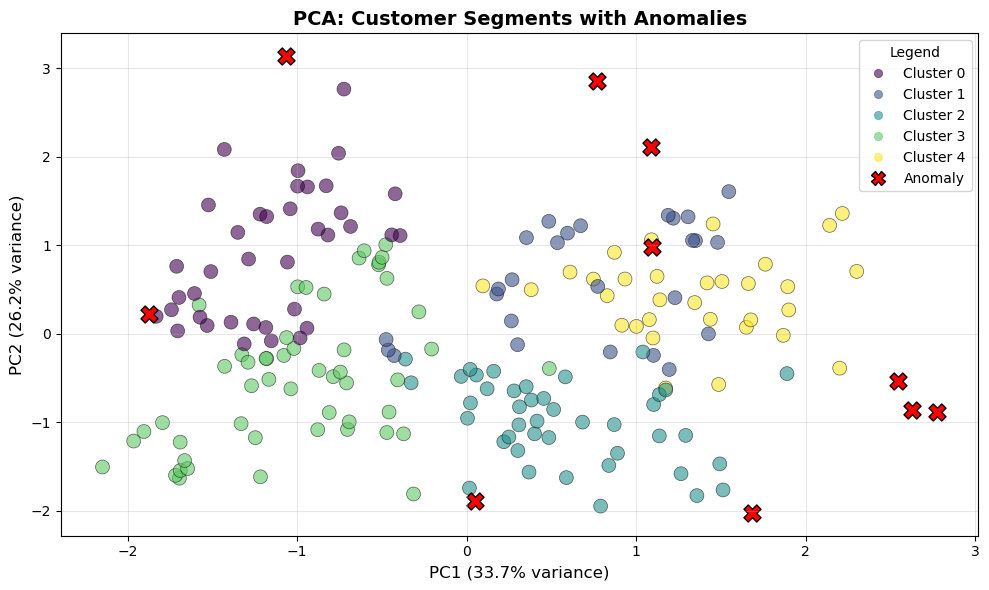

In [17]:
import matplotlib.pyplot as plt

# Prepare data for plotting anomalies
# Create a boolean mask for anomalies
anomaly_mask = (anomaly_labels == -1)

# Separate anomalous and non-anomalous data for PCA
X_pca_anomalies = X_pca[anomaly_mask]
X_pca_normal = X_pca[~anomaly_mask]
clusters_normal = clusters[~anomaly_mask]

# --- PCA Plot with Anomalies ---
plt.figure(figsize=(10, 6))

# Plot normal data points, colored by cluster
scatter_normal = plt.scatter(X_pca_normal[:, 0], X_pca_normal[:, 1],
                             c=clusters_normal, cmap='viridis',
                             s=100, alpha=0.6, edgecolors='black', linewidth=0.5,
                             label='Normal points (by Cluster)')

# Plot anomalous data points
plt.scatter(X_pca_anomalies[:, 0], X_pca_anomalies[:, 1],
            color='red', marker='X', s=150, alpha=1.0, edgecolors='black', linewidth=1,
            label='Anomaly')

# Add cluster specific labels to legend for normal points
handles, labels = scatter_normal.legend_elements()
cluster_labels = [f'Cluster {i}' for i in sorted(list(set(clusters_normal)))]

# Combine legends for normal points (clusters) and anomalies
all_handles = list(handles) + [plt.Line2D([0], [0], marker='X', color='w', label='Anomaly',
                                         markerfacecolor='red', markersize=10, markeredgecolor='black')]
all_labels = cluster_labels + ['Anomaly']

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
plt.title('PCA: Customer Segments with Anomalies', fontsize=14, fontweight='bold')
plt.legend(all_handles, all_labels, title='Legend')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

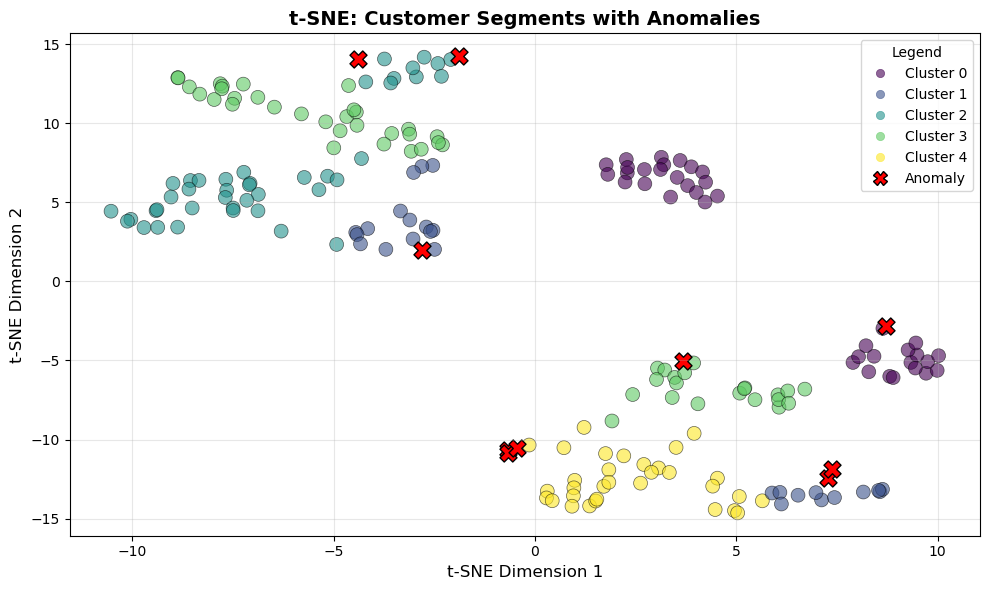

In [18]:
import matplotlib.pyplot as plt

# Prepare data for plotting anomalies
# Create a boolean mask for anomalies
anomaly_mask = (anomaly_labels == -1)

# Separate anomalous and non-anomalous data for t-SNE
X_tsne_anomalies = X_tsne[anomaly_mask]
X_tsne_normal = X_tsne[~anomaly_mask]
clusters_normal = clusters[~anomaly_mask]

# --- t-SNE Plot with Anomalies ---
plt.figure(figsize=(10, 6))

# Plot normal data points, colored by cluster
scatter_normal = plt.scatter(X_tsne_normal[:, 0], X_tsne_normal[:, 1],
                             c=clusters_normal, cmap='viridis',
                             s=100, alpha=0.6, edgecolors='black', linewidth=0.5,
                             label='Normal points (by Cluster)')

# Plot anomalous data points
plt.scatter(X_tsne_anomalies[:, 0], X_tsne_anomalies[:, 1],
            color='red', marker='X', s=150, alpha=1.0, edgecolors='black', linewidth=1,
            label='Anomaly')

# Add cluster specific labels to legend for normal points
handles, labels = scatter_normal.legend_elements()
cluster_labels = [f'Cluster {i}' for i in sorted(list(set(clusters_normal)))]

# Combine legends for normal points (clusters) and anomalies
all_handles = list(handles) + [plt.Line2D([0], [0], marker='X', color='w', label='Anomaly',
                                         markerfacecolor='red', markersize=10, markeredgecolor='black')]
all_labels = cluster_labels + ['Anomaly']

plt.xlabel('t-SNE Dimension 1', fontsize=12)
plt.ylabel('t-SNE Dimension 2', fontsize=12)
plt.title('t-SNE: Customer Segments with Anomalies', fontsize=14, fontweight='bold')
plt.legend(all_handles, all_labels, title='Legend')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

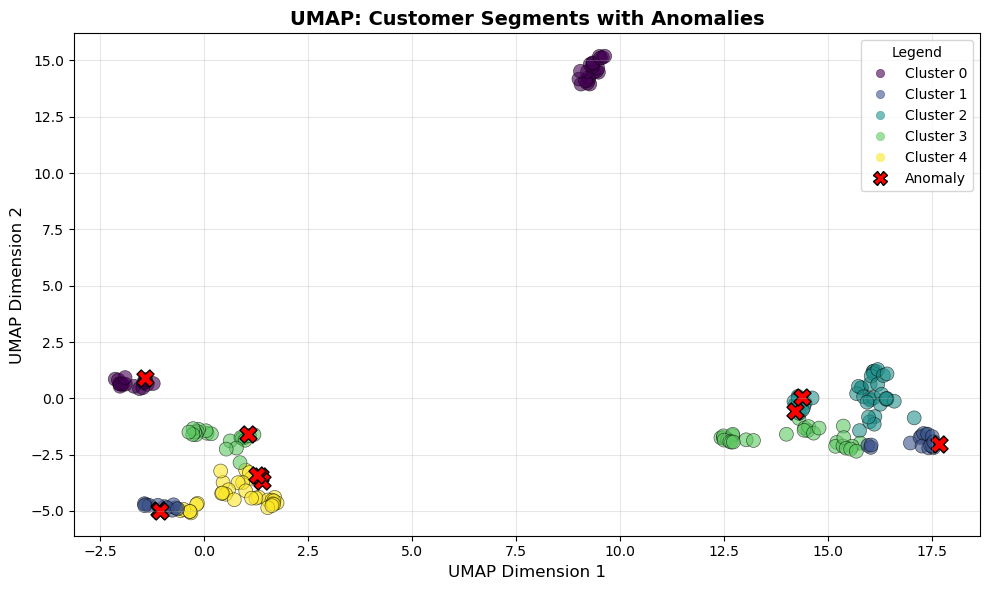

In [19]:
import matplotlib.pyplot as plt

# Prepare data for plotting anomalies
# Create a boolean mask for anomalies
anomaly_mask = (anomaly_labels == -1)

# Separate anomalous and non-anomalous data for UMAP
X_umap_anomalies = X_umap[anomaly_mask]
X_umap_normal = X_umap[~anomaly_mask]
clusters_normal = clusters[~anomaly_mask]

# --- UMAP Plot with Anomalies ---
plt.figure(figsize=(10, 6))

# Plot normal data points, colored by cluster
scatter_normal = plt.scatter(X_umap_normal[:, 0], X_umap_normal[:, 1],
                             c=clusters_normal, cmap='viridis',
                             s=100, alpha=0.6, edgecolors='black', linewidth=0.5,
                             label='Normal points (by Cluster)')

# Plot anomalous data points
plt.scatter(X_umap_anomalies[:, 0], X_umap_anomalies[:, 1],
            color='red', marker='X', s=150, alpha=1.0, edgecolors='black', linewidth=1,
            label='Anomaly')

# Add cluster specific labels to legend for normal points
handles, labels = scatter_normal.legend_elements()
cluster_labels = [f'Cluster {i}' for i in sorted(list(set(clusters_normal)))]

# Combine legends for normal points (clusters) and anomalies
all_handles = list(handles) + [plt.Line2D([0], [0], marker='X', color='w', label='Anomaly',
                                         markerfacecolor='red', markersize=10, markeredgecolor='black')]
all_labels = cluster_labels + ['Anomaly']

plt.xlabel('UMAP Dimension 1', fontsize=12)
plt.ylabel('UMAP Dimension 2', fontsize=12)
plt.title('UMAP: Customer Segments with Anomalies', fontsize=14, fontweight='bold')
plt.legend(all_handles, all_labels, title='Legend')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Analyze Anomaly Distribution Across Clusters



In [20]:
# Add anomaly column
anomalies_only_df = data_clustered[data_clustered['Anomaly'] == -1]

print("Shape of anomalies_only_df:", anomalies_only_df.shape)
print("First 5 rows of anomalies_only_df:")
print(anomalies_only_df.head())

Shape of anomalies_only_df: (10, 7)
First 5 rows of anomalies_only_df:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
2            3  Female   20                  16                       6   
8            9    Male   64                  19                       3   
10          11    Male   67                  19                      14   
12          13  Female   58                  20                      15   
30          31    Male   60                  30                       4   

    Cluster  Anomaly  
2         3       -1  
8         4       -1  
10        4       -1  
12        2       -1  
30        4       -1  


In [21]:
anomaly_counts_per_cluster = anomalies_only_df['Cluster'].value_counts().sort_index()
total_customers_per_cluster = data_clustered['Cluster'].value_counts().sort_index()

# Combine into a single DataFrame for easier analysis and calculation
anomaly_distribution = pd.DataFrame({
    'Total Customers': total_customers_per_cluster,
    'Anomaly Count': anomaly_counts_per_cluster
}).fillna(0) # Fill NaN with 0 for clusters with no anomalies

anomaly_distribution['Anomaly Proportion'] = (anomaly_distribution['Anomaly Count'] / anomaly_distribution['Total Customers']) * 100

print("\nAnomaly Distribution Across Clusters:")
print(anomaly_distribution.round(2))

# Summarize findings
print("\nSummary of Anomaly Distribution:")
print("\nClusters with highest anomaly counts:")
print(anomaly_distribution.sort_values(by='Anomaly Count', ascending=False).head(3))

print("\nClusters with highest anomaly proportion:")
print(anomaly_distribution.sort_values(by='Anomaly Proportion', ascending=False).head(3))


Anomaly Distribution Across Clusters:
         Total Customers  Anomaly Count  Anomaly Proportion
Cluster                                                    
0                     39              1                2.56
1                     29              3               10.34
2                     43              1                2.33
3                     54              2                3.70
4                     35              3                8.57

Summary of Anomaly Distribution:

Clusters with highest anomaly counts:
         Total Customers  Anomaly Count  Anomaly Proportion
Cluster                                                    
1                     29              3           10.344828
4                     35              3            8.571429
3                     54              2            3.703704

Clusters with highest anomaly proportion:
         Total Customers  Anomaly Count  Anomaly Proportion
Cluster                                                    
1    

## Summary:


### Anomaly Distribution Across Clusters:
    *   Cluster 1 had the highest proportion of anomalies at approximately 10.34% (3 anomalies out of 29 customers).
    *   Cluster 4 followed with an 8.57% anomaly proportion (3 anomalies out of 35 customers).
    *   Other clusters (0, 2, 3) showed lower proportions, ranging from 2.33% to 3.70%.




## Part 4: Synergy of Techniques: K-Means, Isolation Forest, and Dimensionality Reduction

Combining K-Means clustering, Isolation Forest anomaly detection, and dimensionality reduction (PCA, t-SNE, UMAP) gave a comprehensive understanding of customer data. Each technique complemented the others:
1. K-Means Clustering: Segmented mall customers into distinct groups using Age, Annual Income, Spending Score, and Gender. It identified typical customer behaviors and established "normal" data patterns, forming the basis for further analysis.

2. Isolation Forest: Built on K-Means’ "normal" segments to detect outliers—customers who deviated significantly from typical patterns (e.g., high income but very low spending). These anomalies could indicate marketing opportunities, data errors, or fraud.

3. Dimensionality Reduction: Transformed complex high-dimensional data into 2D for easy visualization. It helped validate K-Means clusters, pinpoint anomalies (in sparse/peripheral areas), and understand how features shape clusters and anomalies.

4. Synergy: Together, the three techniques worked better than any single method. K-Means defined typical customers; Isolation Forest highlighted unusual cases; dimensionality reduction made insights visual and interpretable. This approach helps businesses target core customers, detect opportunities/risks, and make informed decisions.

## Visual Confirmation of K-Means Clustering Results via Dimensionality Reduction Plots

1. PCA: Separated some clusters reasonably (e.g., Cluster 0 and 1) but had overlap between Cluster 2, 3 and 4. Anomalies (red X) were at cluster peripheries. It explained 59.9% of data variance, offering an initial view of data structure.

2. t-SNE: Showed clearer, more compact clusters than PCA with distinct boundaries. It excelled at visualizing local data structure, strongly confirming K-Means’ effectiveness.

3. UMAP: Achieved excellent cluster separation (similar to t-SNE, even better in some areas) with tightly packed, isolated clusters. It preserved both local and global data structure, supporting K-Means results.

Conclusion: T-SNE and UMAP effectively validated K-Means clustering (clear, distinct clusters). While PCA had some overlap, non-linear methods (t-SNE, UMAP) delineated groups clearly. Anomalies consistently outside clusters further validated clustering and anomaly detection.

## Analyze Anomaly Alignment with Clusters

Anomaly Alignment with Clusters
1. Numerical Distribution: Anomalies were unevenly distributed—highest in Cluster 1 (10.34%) and Cluster 4 (8.57%), lowest in Clusters 0 (2.56%) and 2 (2.33%), moderate in Cluster 3 (3.70%).

2. Visual Observation: Anomalies mostly located at cluster peripheries, between clusters, or near Clusters 1 and 4 (consistent with numerical data).

Conclusion on Anomaly Alignment: Anomalies were not random—some were extreme variations within clusters, others were novel patterns. They revealed valuable deviations from typical customer segments.

## Business Recommendations Based on Customer Segmentation and Anomaly Detection

1. For K-Means Segments: Tailor strategies to each cluster’s traits (e.g., loyalty programs for Cluster 0; engagement initiatives for Cluster 1; value promotions for Cluster 2; affordable trends for Cluster 3; practical offerings for Cluster 4). Monitor anomalies in Clusters 1 and 4.
2. For Anomaly Types: Address each anomaly type specifically (e.g., essential services for frugal elderly; fraud checks for low-income high-spending youth; bespoke services for high-value outliers).

3. Overarching Strategies: Adopt dynamic customer targeting, an anomaly feedback loop, and behavior-based personalization at scale.